### input

`t` : time asked

`avg_ang_sp` : average speed to finish a full orbit

`sma` : semimajor axis

`ecc` : eccentricy

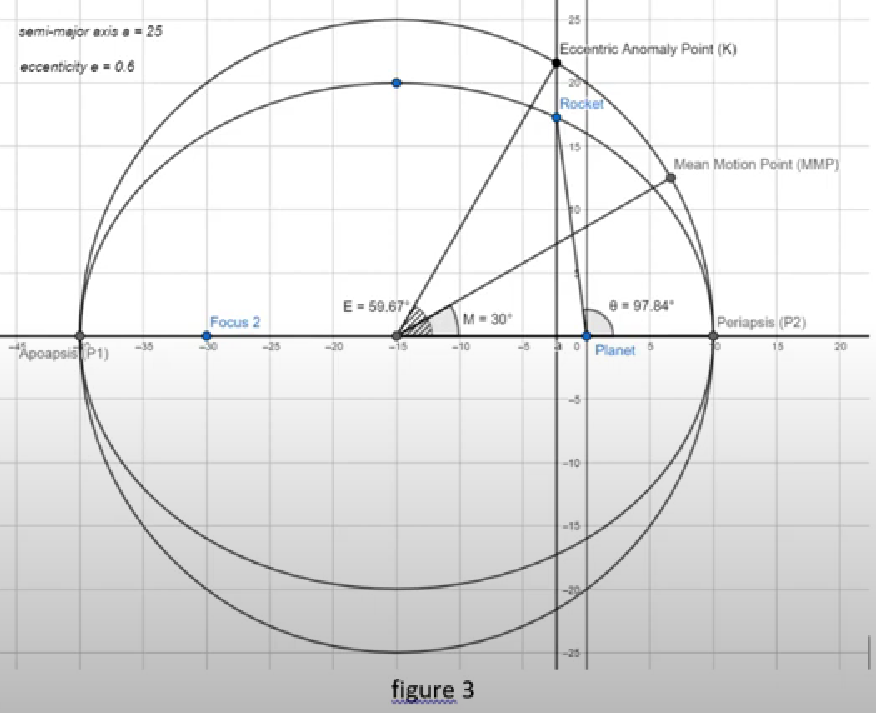

### step
1. calculate M using t
2. calculate E using M
3. calculate theta using E
4. calculate r using theta, a, e

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import kepler 

G = 6.674*1e-11 #m^3 kg^-1 s^-2
s_in_year = 3.154e+7 # s_in_year s = 1 year
Msun_in_kg = 1.98847e+30 # Msun_in_kg kg = 1 Msun
Mjup_in_kg = 1.898e+27 # Mjup_in_kg kg = 1 Mjup
au_in_m = 149597870700 # au_in_m m = 1 au


def atop_sunjup(a, M, m):
    """
    Converts semimajor axis to period, with the units in au, solar mass (larger), and jupiter mass (smaller).
    Returning period in the unit of second.
    Usage: atop_sunjup(semimajor_axis, larger_mass, smaller_mass)
    """
    P = (( (a*au_in_m)**3 * 4 * np.pi**2)/(G*((M*Msun_in_kg)+(m*Mjup_in_kg))))**0.5
    print(f'P = ', P / s_in_year, ' years')
    return P

def atop_sunsun(a, M, m):
    """
    Converts semimajor axis to period, with the units in au, solar mass (larger and smaller).
    Returning period in the unit of second.
    Usage: atop_sunsun(semimajor_axis, larger_mass, smaller_mass)
    """
    P = (( (a*au_in_m)**3 * 4 * np.pi**2)/(G*((M*Msun_in_kg)+(m*Msun_in_kg))))**0.5
    print(f'P = ', P / s_in_year, ' years')
    return P
    
def atop_si(a, M, m):
    """
    Converts semimajor axis to period, with the units in m and kg (all bodies).
    Returning period in the unit of second.
    Usage: atop_si(semimajor_axis, larger_mass, smaller_mass)
    """
    P = (( (a)**3 * 4 * np.pi**2)/(G*((M)+(m))))**0.5
    #print(f'P = ', P / s_in_year, ' years')
    return P #in second

def ptoa_sunjup(P,M,m):
    """
    Converts period to semimajor axis, with the units in year, solar mass (larger), and jupiter mass (smaller).
    Returning semimajor axis in the unit of m.
    Usage: ptoa_sunjup(period, larger_mass, smaller_mass)
    """
    a = (((P*s_in_year)**2 * G * ((M*Msun_in_kg)+(m*Mjup_in_kg)))/(4 * np.pi**2))**(1/3)
    print(f'a = ', a/au_in_m, 'au')
    return a

def ptoa_si(P,M,m):
    """
    Converts period to semimajor axis, with the units in s and kg (all bodies).
    Returning semimajor axis in the unit of m.
    Usage: ptoa_si(period, larger_mass, smaller_mass)
    """
    a = ((P**2 * G * (M+m))/(4 * np.pi**2))**(1/3)
    print(f'a = ', a/au_in_m, 'au')
    return a

In [2]:
def arcocos(costheta):
    """
    Calculate the arccosine of an angle to give a full-circle angle (0-2pi).
    Input: cos_angle in float list
    Output: angle (rad)
    Usage: arcocos(cos_angle)
    """
    theta = np.arccos(costheta)
    tarr = []
    for i in range(0,len(theta)):
        if i == 0:
            tarr.append(theta[i])
        elif i == 1:
            selisih = theta[i] - theta[i-1]
            indi = np.sign(selisih)
            tarr.append(theta[i])
        else:
            selisih = theta[i] - theta[i-1]
            indi2 = np.sign(selisih)
            if indi2 != indi:
                theta = 2*np.pi - theta
                tarr.append(theta[i])
            else:
                tarr.append(theta[i])
    tarr = np.array(tarr)
    return(tarr)

def avg_ang_speed(per):
    """
    Calculate average angular speed of the smaller body.
    Input: period (s).
    Output: average angular speed, in rad/s.
    Usage: avg_ang_speed(period)
    """
    avg_ang_sp = 2*np.pi/per # rad / s
    return avg_ang_sp

def mean_anomaly(t, avg_ang_sp):
    """
    Calculate the mean anomaly of the smaller body, at each time in the orbit.
    Input: time (s), average angular speed (rad/s)
    Output: mean anomaly (rad)
    Usage: mean_anomaly(time, avg_ang_speed)
    """
    mean_anom = avg_ang_sp * t
    return mean_anom

def kepler_solve(mean_anom, ecc):
    """
    Solve the Kepler equation.
    Input: mean anomaly (rad), eccentricity
    Output: eccentric anomaly (rad), true anomaly (rad)
    Usage: kepler_solve(mean_anomaly, eccentricity)
    """
    ecc_anom, cos_TA, sin_TA = kepler.kepler(mean_anom, ecc)
    true_anom = arcocos(cos_TA)
    return ecc_anom, true_anom

def pos(sma, ecc, true_anomaly):
    """
    Calculate the position (r, theta) of a body in the orbit.
    Input: semimajor axis (any unit), eccentricity, true anomaly (rad)
    Output: r (related unit), true anomaly (rad) 
    Usage: pos(semimajor_axis, eccentricity, true_anomaly)
    """
    r = sma * (1 - ecc**2) / (1 + ecc * np.cos(true_anomaly))
    return r, true_anomaly

def radial_velocity(true_anom, omega, ecc, gamma, sma, incl, mass1, mass2):
    """
    Calculate the radial velocity of the smaller body around the larger body.
    Input: true anomaly (rad), omega (rad), eccentricity, gamma (m/s), period (s), inclination (rad), larger mass (kg), smaller mass (kg)
    Output: radial velocity (m/s)
    Usage: radial_velocity(true_anomaly, omega, eccentricity, gamma, period, inclination, larger_mass, smaller_mass)
    """
    G = 6.6743*1e-11 #m3 kg-1 s-2
    K = np.sqrt(G/(1-ecc**2))*mass2*np.sin(incl)*((mass1+mass2)**(-0.5))*(sma**(-0.5))
    rad_vel = K * (np.cos(true_anom + omega) + (ecc * np.cos(omega))) + gamma
    return rad_vel

def ind_radial_velocity(true_anom, omega, ecc, gamma, sma, incl, mass_obj, mass_total):
    """
    Calculate the individual radial velocity of each body towards the system barycenter. Can be used to calculate the relative radial velocity.
    Input: true anomaly (rad), omega (rad), eccentricity, gamma (m/s), period (s), inclination (rad), larger mass (kg), smaller mass (kg)
    Output: individual radial velocity (m/s)
    Usage: radial_velocity(true_anomaly, omega, eccentricity, gamma, semimajor axis of the object, inclination, larger_mass, smaller_mass)
    """
    G = 6.6743*1e-11 #m3 kg-1 s-2
    K = np.sqrt(G/(1-ecc**2))*mass_obj*np.sin(incl)*((mass_total)**(-0.5))*(sma**(-0.5))
    rad_vel = K * (np.cos(true_anom + omega) + (ecc * np.cos(omega))) + gamma
    return rad_vel

# radial velocity, calculated from youtube

what we need:
* true anomaly <br>
`ecc_anom, true_anom = kepler_solve(mean_anom, ecc)`
* argument of periastron
* eccentricity

In [3]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

#load observational data
df = pd.read_csv('HD4747_RV.dat',delim_whitespace=True,skiprows=[1])

df=df.iloc[2:,:]

df=df.rename(columns={"#":"jd", "Instrument:":"RV", "HIRES":"eRV", "on":"Instruments"}).reset_index()

df=df.drop(columns=['index', 'Keck'])

df=df.astype('float')

In [4]:
df

,jd,RV,eRV,Instruments
0,2.450367e+06,-706.62,1.21,0.0
1,2.450419e+06,-564.86,1.95,0.0
2,2.450463e+06,-403.43,1.19,0.0
3,2.450690e+06,204.83,1.27,0.0
4,2.450785e+06,300.12,1.61,0.0
5,2.450807e+06,319.87,1.11,0.0
6,2.450838e+06,327.07,1.28,0.0
7,2.450839e+06,331.62,1.27,0.0
8,2.450840e+06,338.67,1.21,0.0
9,2.451010e+06,368.21,1.35,0.0


In [5]:
m1 = 0.83 * 2e+30 # kg - PRIMARY MASS
m2 = 66.4 * 2e+27 # kg - SECONDARY MASS
sma = 10.10 * 1.5e+11 # m - SEMI-MAJOR AXIS
ecc = 0.73 # ECCENTRICITY
incl = np.deg2rad(50) # deg - INCLINATION
period = atop_si(sma, m1, m2) # s - PERIOD
t0 = (2462615-period/3600/24/2)*24*3600 # s - TIME OF PERIASTRON PASSAGE
tend1 = (2456508.14205+period/3600/24*2)*24*3600 # s - MAXIMUM TIME TO BE SIMULATED
omega = np.deg2rad(-95) # rad - ARGUMENT OF PERIASTRON

# create array of time, with t0 as the first element of the array
time = np.arange(t0, tend1, 10*24*3600)

# calculate average angular speed
avg_ang_sp_hd = avg_ang_speed(period)
# calculate mean anomaly
mean_anom_hd = mean_anomaly(time,  avg_ang_sp_hd)
# calculate eccentric anomaly and true anomaly
ecc_anom, true_anom = kepler_solve(mean_anom_hd, ecc)

# calculate r, theta of the companion in the orbit
pos_obj, TeA_obj = pos(sma, ecc, true_anom)

# calculate RV of the companion
rad_vel = radial_velocity(true_anom, omega, ecc, -330, sma, incl, m1, m2)

In [6]:
2462615-period/3600/24/2

2456416.365108303

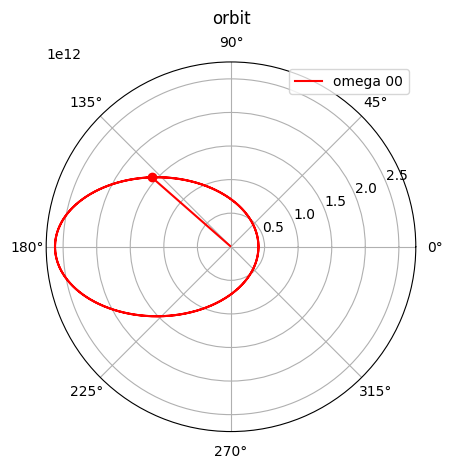

In [7]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(TeA_obj, pos_obj, 'r-', label='omega 00')
ax.plot(TeA_obj[0], pos_obj[0], 'ro')
ax.vlines(TeA_obj[0], 0, pos_obj[0], colors='r', zorder=3)
ax.legend()
ax.grid(True)

ax.set_title("orbit", va='bottom')
plt.show()

<ErrorbarContainer object of 3 artists>

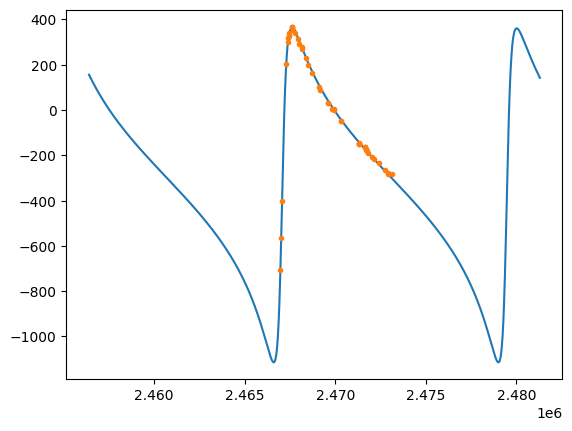

In [8]:
diff = np.abs(df['jd'][df['RV'].idxmax()] - time[np.argmax(rad_vel)]/24/3600)
plt.plot(time/24/3600, rad_vel)
plt.errorbar(df['jd']+diff, df['RV'], df['eRV'], fmt='.')

(-800.0, 400.0)

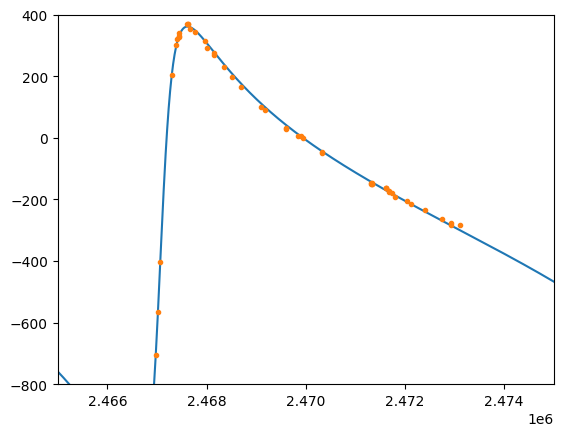

In [9]:
plt.plot(time/24/3600, rad_vel)
plt.errorbar(df['jd']+diff, df['RV'], df['eRV'], fmt='.')
plt.xlim(2465000, 2475000)
plt.ylim(-800, 400)

# Relative RVs

In [10]:
m1 = 0.83 * 2e+30 # kg - PRIMARY MASS
m2 = 66.4 * 2e+27 # kg - SECONDARY MASS
sma = 10.10 * 1.5e+11 # m - SEMI-MAJOR AXIS OF THE SYSTEM
m1_m2 = m1 / m2
sma1 = sma / (1+m1_m2) # m - SEMI-MAJOR AXIS FOR PRIMARY OBJECT
sma2 = sma - sma1 # m - SEMI-MAJOR AXIS FOR SECONDARY OBJECT
ecc = 0.73 # ECCENTRICITY
incl = np.deg2rad(50) # deg - INCLINATION
period = atop_si(sma, m1, m2) # s - PERIOD
t0 = 2450366.97498*24*3600 # s - TIME OF PERIASTRON PASSAGE
tend1 = 2450366.97498*24*3600 + period # s - MAX TIME TO BE SIMULATED
omega = np.deg2rad(-95) # ARGUMENT OF PERIASTRON

time = np.arange(t0, tend1, 10*24*3600) # ARRAY OF TIME TO BE SIMULATED

# calculate average angular speed
avg_ang_sp_hd = avg_ang_speed(period)

# calculate mean anomaly
mean_anom_hd = mean_anomaly(time,  avg_ang_sp_hd)

# calculate eccentric anomaly and true anomaly
ecc_anom, true_anom = kepler_solve(mean_anom_hd, ecc)


# calculate r, theta of primary object
pos_obj_1, TeA_obj_1 = pos(sma1, ecc, true_anom)

# calculate r, theta of secondary object
pos_obj_2, TeA_obj_2 = pos(sma2, ecc, true_anom-np.pi)


# calculate RV of primary object
rad_vel1= ind_radial_velocity(true_anom, omega, ecc, -330, sma1, incl, m2, m1+m2)

# calculate RV of secondary object
rad_vel2= ind_radial_velocity(true_anom-np.pi, omega, ecc, -330, sma2, incl, m1, m1+m2)

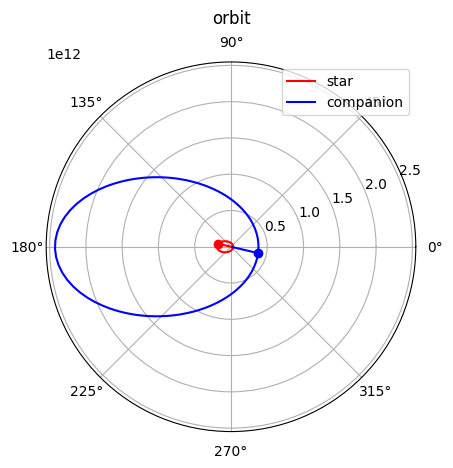

In [11]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(TeA_obj_1, pos_obj_1, 'r-', label='star')
ax.plot(TeA_obj_1[0], pos_obj_1[0], 'ro')
ax.vlines(TeA_obj_1[0], 0, pos_obj_1[0], colors='r', zorder=3)
ax.plot(TeA_obj_2, pos_obj_2, 'b-', label='companion')
ax.plot(TeA_obj_2[0], pos_obj_2[0], 'bo')
ax.vlines(TeA_obj_2[0], 0, pos_obj_2[0], colors='b', zorder=3)
ax.legend()
ax.grid(True)

ax.set_title("orbit", va='bottom')
plt.show()

In [12]:
# calculate relative RV

rel_rv = rad_vel2 - rad_vel1

In [13]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

df = pd.read_csv('HD4747_FAKE_relativeRV.dat',delim_whitespace=True,skiprows=[1])

df=df.iloc[2:,:]

df=df.rename(columns={"#":"jd", "Instrument:":"relRV", "Fake.":"eRV", "These":"Instruments"}).reset_index()

df=df.drop(columns=['index', 'data', 'are', 'fake.', 'They', 'are.1', 'from', 'a', 'REBOUND', 'simulation', 'of', 'RV', 'planet', '-', 'RV.1', 'star'])

df=df.astype('float')

In [14]:
df

,jd,relRV,eRV,Instruments
0,2456000.0,-886.690050,20.0,0.0
1,2456050.0,-829.686055,20.0,0.0
2,2456400.0,-432.581370,20.0,0.0
3,2456450.0,-376.023257,20.0,0.0


Text(0, 0.5, 'Radial Velocity (m/s)')

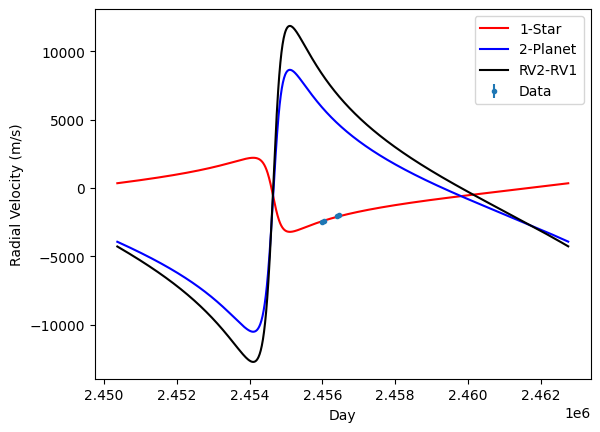

In [15]:
diffrel = np.abs(df['jd'][df['relRV'].idxmax()] - time[np.argmax(rel_rv)]/24/3600)

plt.plot(time/24/3600, rad_vel1, 'r-', label='1-Star')
plt.plot(time/24/3600, rad_vel2, 'b-', label='2-Planet')
plt.plot(time/24/3600, rel_rv, 'k-', label='RV2-RV1')
plt.errorbar(df['jd'], df['relRV']-1600, df['eRV'], fmt='.', label='Data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Radial Velocity (m/s)')

Text(0, 0.5, 'Radial Velocity (m/s)')

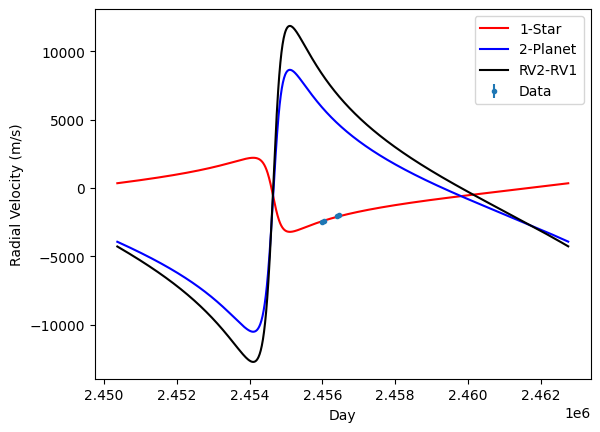

In [19]:
diffrel = np.abs(df['jd'][df['relRV'].idxmax()] - time[np.argmax(rel_rv)]/24/3600)

plt.plot(time/24/3600, rad_vel1, 'r-', label='1-Star')
plt.plot(time/24/3600, rad_vel2, 'b-', label='2-Planet')
plt.plot(time/24/3600, rel_rv, 'k-', label='RV2-RV1')
plt.errorbar(df['jd'], df['relRV']-1600, df['eRV'], fmt='.', label='Data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Radial Velocity (m/s)')
#plt.xlim(2455000, 2457000)
#plt.ylim(-3000,-1000)

(-3000.0, -1000.0)

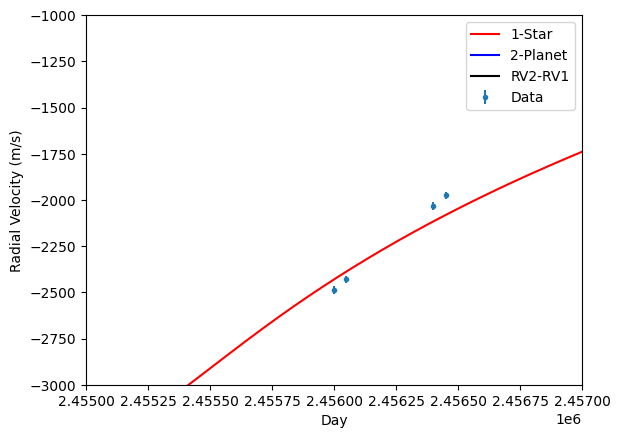

In [18]:
diffrel = np.abs(df['jd'][df['relRV'].idxmax()] - time[np.argmax(rel_rv)]/24/3600)

plt.plot(time/24/3600, rad_vel1, 'r-', label='1-Star')
plt.plot(time/24/3600, rad_vel2, 'b-', label='2-Planet')
plt.plot(time/24/3600, rel_rv, 'k-', label='RV2-RV1')
plt.errorbar(df['jd'], df['relRV']-1600, df['eRV'], fmt='.', label='Data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Radial Velocity (m/s)')
plt.xlim(2455000, 2457000)
plt.ylim(-3000,-1000)